# Link to dataset
https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset#insurance3r2.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv("Downloads/InsuranceClaimPredictionSample01-master/insurance2.csv", index_col=None)
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [4]:
df.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [5]:
df.isna().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
x = df.sex.value_counts()

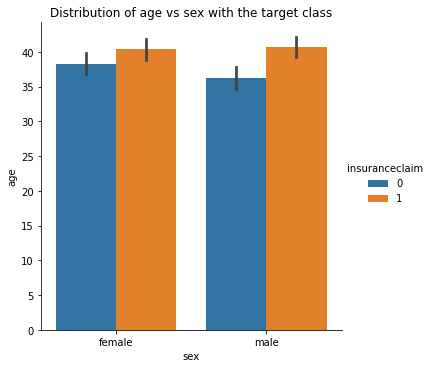

In [7]:
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'insuranceclaim')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [8]:
df['sex'] = df.sex.map({'female': 0, 'male': 1})

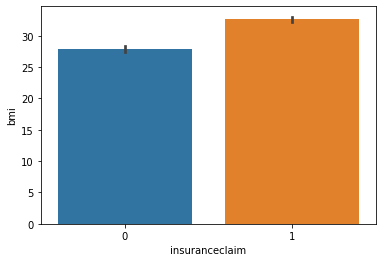

In [9]:
sns.barplot(x=df['insuranceclaim'],y=df['bmi'],data=df)

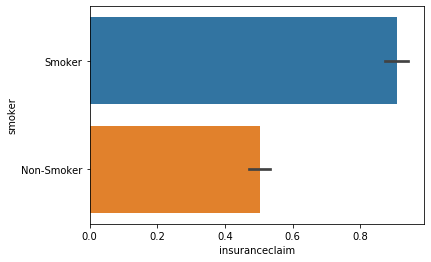

In [10]:
df['smoker']=df.smoker.map({0:'Non-Smoker',1:'Smoker'})
sns.barplot(x=df['insuranceclaim'],y=df['smoker'],data=df)

In [11]:
df['smoker']=df.smoker.map({'Non-Smoker':0,'Smoker':1})
df.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

<Figure size 1440x360 with 0 Axes>

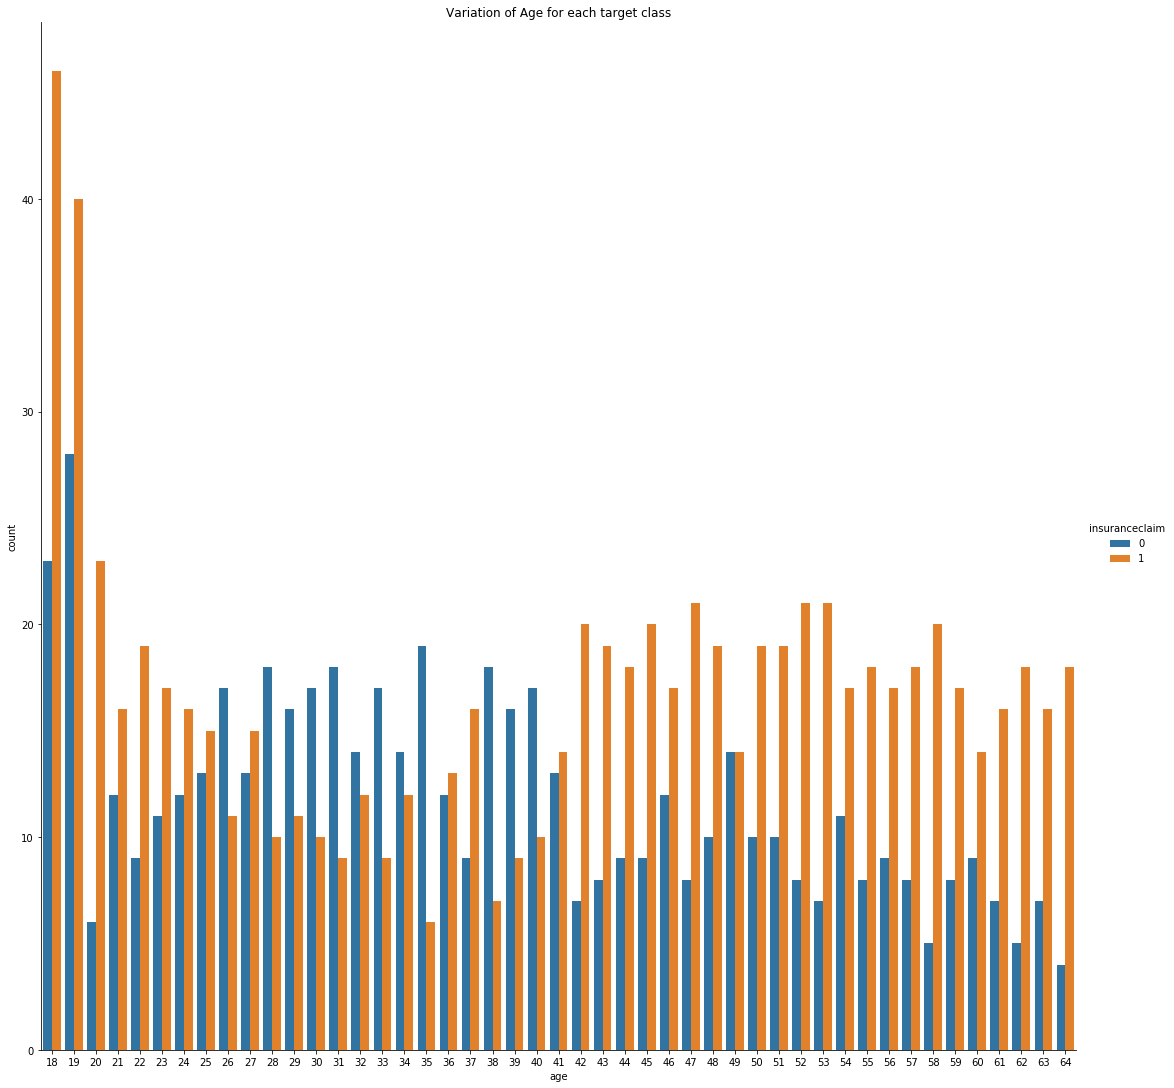

In [12]:
plt.figure(figsize=(20,5))
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'insuranceclaim',height=15,aspect=1 ,order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

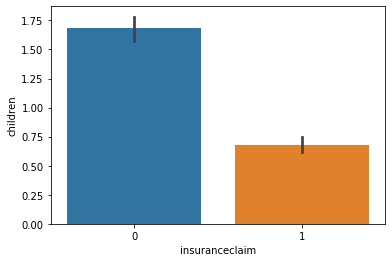

In [13]:
sns.barplot(x=df['insuranceclaim'],y=df['children'],data=df)

In [14]:
df['region'] = df.region.map({0: 'Northeast', 1: 'Northwest',2:'Southeast',3:'Southwest'})
df.region.value_counts()

Southeast    364
Southwest    325
Northwest    325
Northeast    324
Name: region, dtype: int64

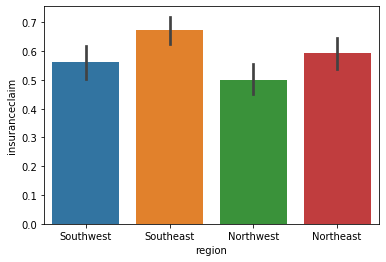

In [15]:
sns.barplot(x=df['region'],y=df['insuranceclaim'],data=df)

In [16]:
df['region'] = df.region.map({'Northeast':0,'Northwest' :1,'Southeast':2,'Southwest':3})
df.region.value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

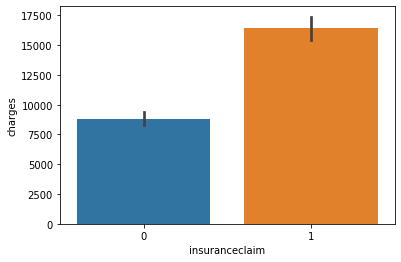

In [17]:
sns.barplot(x=df['insuranceclaim'],y=df['charges'],data=df)

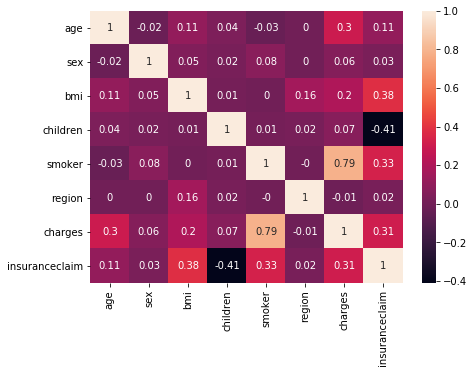

In [18]:
fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims)
corr=round(df.corr(),2)
sns.heatmap(corr,annot=True,ax=ax)

In [19]:
df.shape

(1338, 8)

In [20]:
X = df.drop(columns=['insuranceclaim'])
y = df['insuranceclaim']

In [21]:
lr=LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)

X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

In [23]:
LR_result=lr.fit(X_train,y_train)
LR_result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred=LR_result.predict(X_test)
LR_result.score(X_test,y_test)

0.8805970149253731

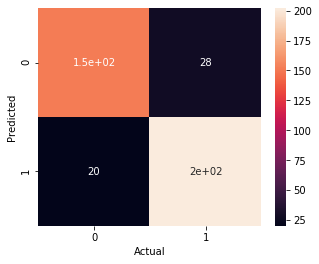

In [25]:
fig_dims = (5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
confusion_matrix1=confusion_matrix(y_test,y_pred)
confusion_matrix1 = pd.crosstab(y_test, y_pred, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix1,annot=True,ax=ax)
plt.show()

In [26]:
confusion_matrix2=confusion_matrix(y_test,y_pred)
print(confusion_matrix2)

[[152  28]
 [ 20 202]]


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       180
           1       0.88      0.91      0.89       222

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



Text(0.5, 0, 'Importance')

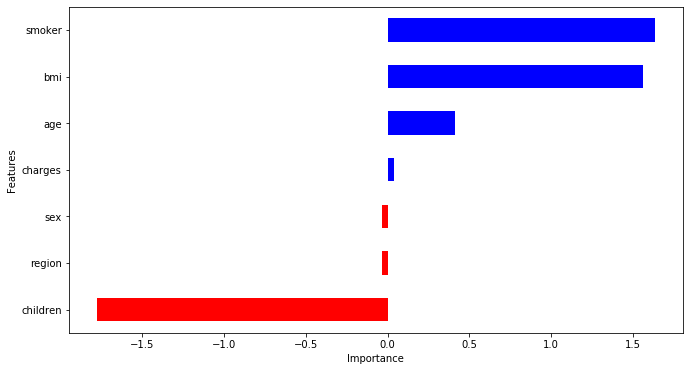

In [28]:
coeff = list(LR_result.coef_[0])
labels = list(df.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')